In [ ]:
!pip install chardet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import chardet
import seaborn as sns




In [ ]:
dados = pd.read_csv('data.csv', encoding='latin-1')

In [ ]:
dados.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
dados.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
dados["CustomerID"].isna().sum()


135080

In [ ]:
# Soma a quantidade de nulos das colunas
dados.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
dados = dados.dropna(subset=["CustomerID"])
dados = dados.dropna(subset=["Description"])

In [ ]:
dados["CustomerID"].isna().sum()
dados["Description"].isna().sum()

0

In [ ]:
dados.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
#FILTROS

In [ ]:
#valores nulos ou menores na coluna unitprice
dados["UnitPrice"].isna().sum() + (dados["UnitPrice"] <= 0).sum()

0

In [ ]:
dados["Quantity"].isna().sum() + (dados["Quantity"] <= 0).sum()

8905

In [ ]:
#conter preços apenas >0
dados = dados.loc[dados["UnitPrice"] > 0]

In [ ]:
#verificando se ainda tem
dados["UnitPrice"].isna().sum() + (dados["UnitPrice"] <= 0).sum()


0

In [ ]:
dados = dados.loc[dados["Quantity"] > 0]

In [ ]:
dados["Quantity"].isna().sum() + (dados["Quantity"] <= 0).sum()

0

In [ ]:
#linhas duplicadas
dados.duplicated().sum()

5192

In [ ]:
#removendo
dados = dados.drop_duplicates()


In [ ]:
dados.duplicated().sum()

0

In [ ]:
#corrigindo tipos de dados das colunas

In [ ]:
dados["CustomerID"] = dados["CustomerID"].astype("int")

In [ ]:
dados["CustomerID"].dtype

dtype('int64')

In [ ]:
dados["InvoiceDate"] = pd.to_datetime(dados["InvoiceDate"])

In [ ]:
dados["InvoiceDate"].dtype

dtype('<M8[ns]')

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


In [ ]:
#tratando outliers

<Axes: xlabel='Quantity'>

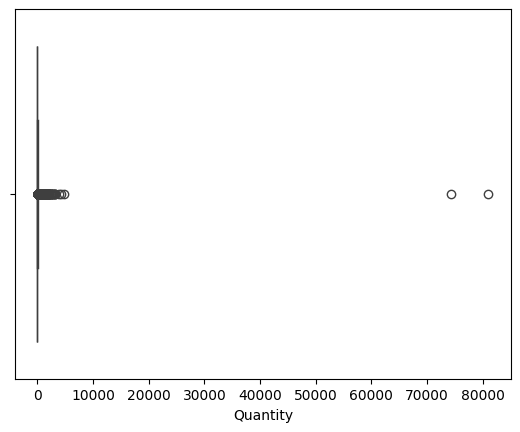

In [ ]:
sns.boxplot(data=dados, x="Quantity")



{'whiskers': [<matplotlib.lines.Line2D at 0x7d77725b4460>,
 'caps': [<matplotlib.lines.Line2D at 0x7d77725b4880>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d77725b41c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d77725b4dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d77725b5060>],
 'means': []}

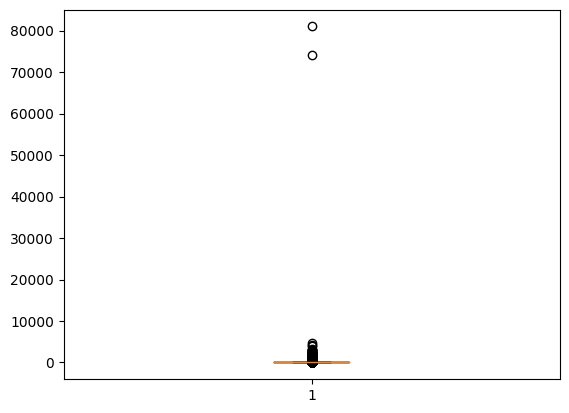

In [ ]:
plt.boxplot(dados['Quantity'])

<Axes: xlabel='UnitPrice'>

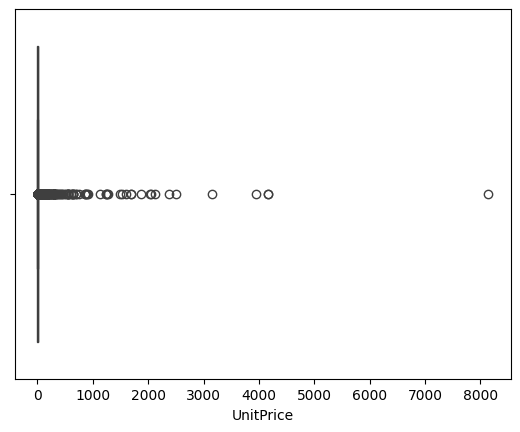

In [ ]:
sns.boxplot(data=dados, x="UnitPrice")

{'whiskers': [<matplotlib.lines.Line2D at 0x7d777ade8fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d777ade94e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d777ade8d00>],
 'medians': [<matplotlib.lines.Line2D at 0x7d777ade9a20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d7772638f40>],
 'means': []}

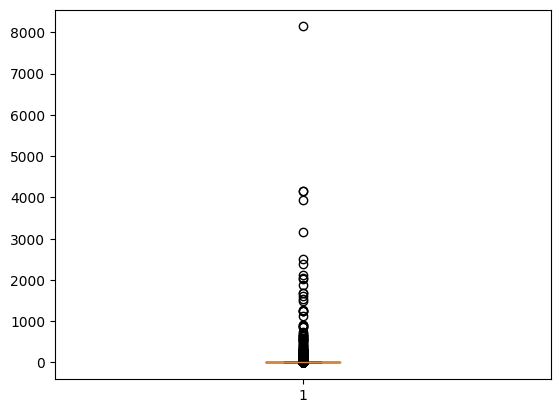

In [ ]:
plt.boxplot(dados['UnitPrice'])

In [ ]:
#removendo
dados = dados.loc[(dados["Quantity"] <= 10000) & (dados["UnitPrice"] <= 5000)]

In [ ]:
print(dados.shape)

(392689, 8)


In [ ]:
#criando uma nova coluna
dados["TotalPrice"] = dados["Quantity"] * dados["UnitPrice"]


In [ ]:
dados.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
#última compra
ultima_compra = dados["InvoiceDate"].max()

In [ ]:
print(ultima_compra)

2011-12-09 12:50:00


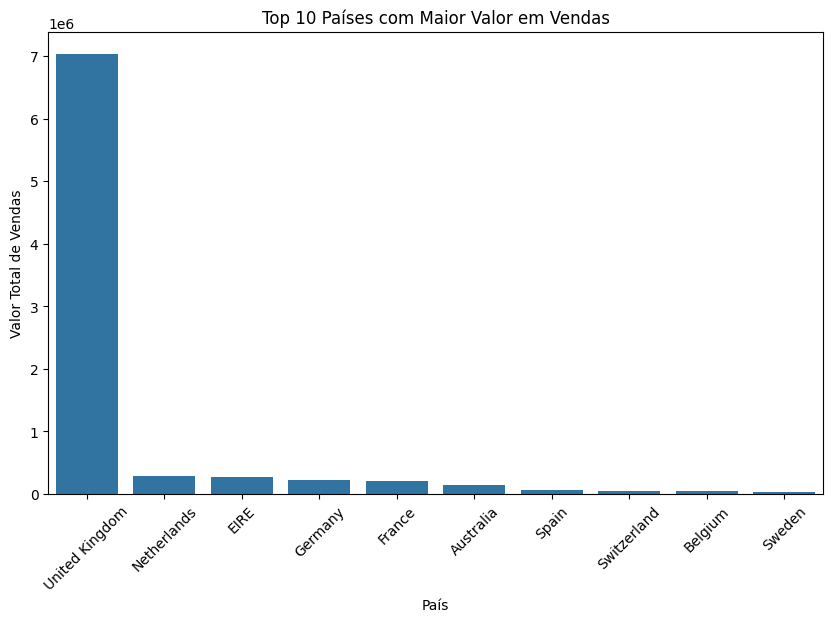

In [ ]:
#Top 10 Países com Maior Valor em Vendas
top_paises = pais_vendas.index[:10]
pais_vendas = dados[dados["Country"].isin(top_paises)].groupby("Country")["TotalPrice"].sum()
pais_vendas = pais_vendas.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=pais_vendas.index, y=pais_vendas.values)
plt.xlabel("País")
plt.ylabel("Valor Total de Vendas")
plt.xticks(rotation=45)
plt.title('Top 10 Países com Maior Valor em Vendas')
plt.show()

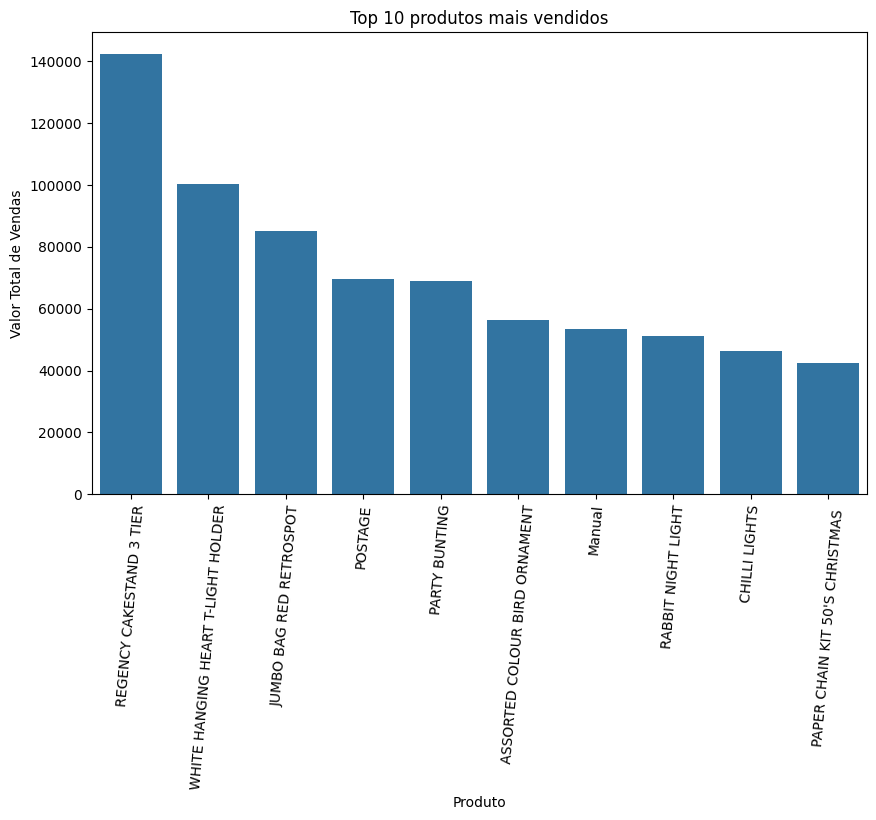

In [ ]:
#Top 10 produtos mais vendidos
top_produtos = produto_vendas.index[:10]
produto_vendas = dados[dados["Description"].isin(top_produtos)].groupby("Description")["TotalPrice"].sum()
produto_vendas = produto_vendas.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=produto_vendas.index, y=produto_vendas.values)
plt.xlabel("Produto")
plt.ylabel("Valor Total de Vendas")
plt.xticks(rotation=85)
plt.title('Top 10 produtos mais vendidos')
plt.show()

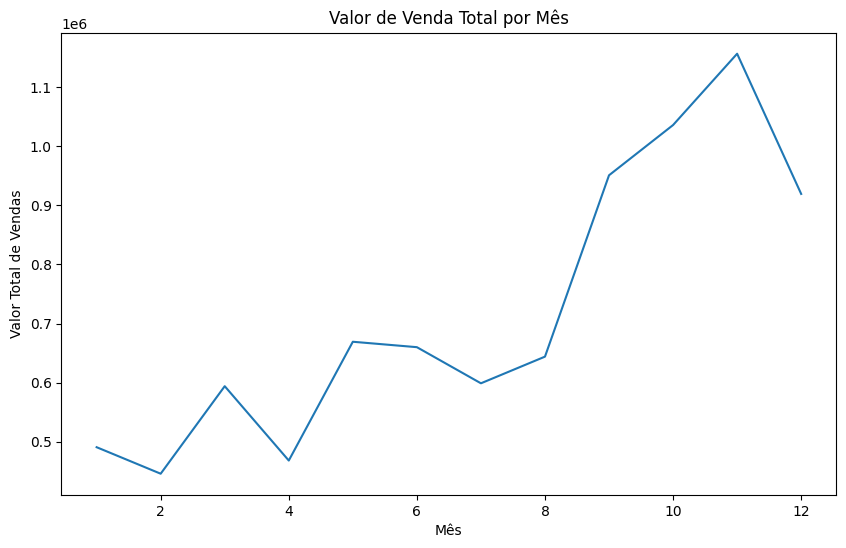

In [ ]:
#Valor de Venda Total por Mês
mes_vendas = dados.groupby(dados["InvoiceDate"].dt.month)["TotalPrice"].sum()
plt.figure(figsize=(10, 6))
plt.plot(mes_vendas.index, mes_vendas.values)
plt.xlabel("Mês")
plt.ylabel("Valor Total de Vendas")
plt.title("Valor de Venda Total por Mês")
plt.show()

In [ ]:
#Top 10 Valor de venda total por mês e por país

In [ ]:
dados["Mês"] = dados["InvoiceDate"].dt.month_name()

In [ ]:
pais_mes_vendas = dados.groupby(["Country", "Mês"])["TotalPrice"].sum()

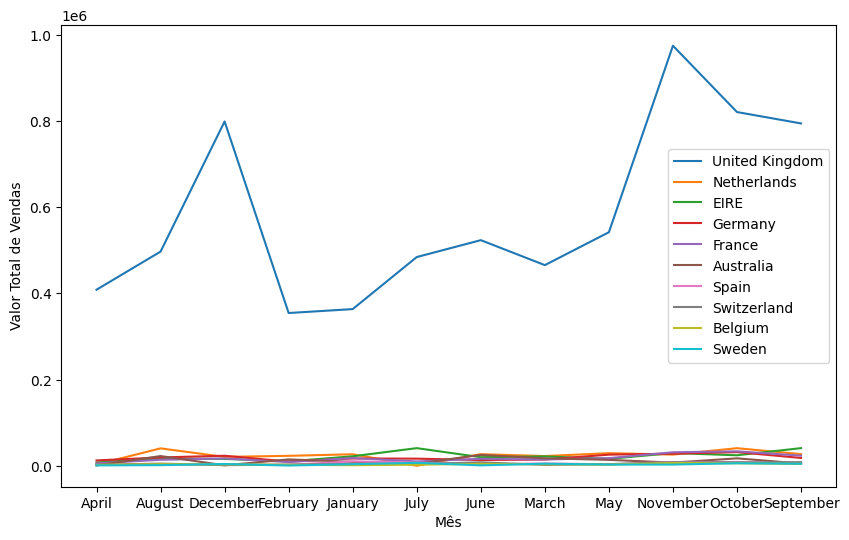

In [ ]:
top_paises = pais_vendas.groupby(level="Country").sum().sort_values(ascending=False).index[:10]
plt.figure(figsize=(10, 6))
for pais in top_paises:
    plt.plot(pais_mes_vendas[pais].index, pais_mes_vendas[pais].values, label=pais)
plt.xlabel("Mês")
plt.ylabel("Valor Total de Vendas")
plt.legend()
plt.show()

In [ ]:
#criando uma coluna para facilitar
dados["Data da Compra"] = pd.to_datetime(dados["InvoiceDate"])

In [ ]:
#Agrupando
dados_rfm = dados.groupby(["CustomerID", "InvoiceNo"])["Data da Compra", "TotalPrice"].agg({"Data da Compra": "max", "TotalPrice": "sum"})


<ipython-input-119-34b4f5edd699>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dados_rfm = dados.groupby(["CustomerID", "InvoiceNo"])["Data da Compra", "TotalPrice"].agg({"Data da Compra": "max", "TotalPrice": "sum"})


In [ ]:
dados_rfm.columns = ["DataUltimaCompra", "ValorTotalCompras"]


In [ ]:
#recência
ultima_compra = dados_rfm["DataUltimaCompra"].max()
dados_rfm["Recencia"] = (ultima_compra - dados_rfm["DataUltimaCompra"]).dt.days


In [ ]:
#frequência
dados_rfm["Frequencia"] = dados_rfm.groupby("CustomerID").size()

In [ ]:
#ticket médio
dados_rfm["TicketMedio"] = dados_rfm["ValorTotalCompras"] / dados_rfm["Frequencia"]

In [ ]:
#RFM
print(dados_rfm)

                        DataUltimaCompra  ValorTotalCompras  Recencia  \
CustomerID InvoiceNo                                                    
12347      537626    2010-12-07 14:57:00             711.79       366   
           542237    2011-01-26 14:30:00             475.39       316   
           549222    2011-04-07 10:43:00             636.25       246   
           556201    2011-06-09 13:01:00             382.52       182   
           562032    2011-08-02 08:48:00             584.91       129   
...                                  ...                ...       ...   
18283      579673    2011-11-30 12:59:00             220.31         8   
           580872    2011-12-06 12:02:00             208.00         3   
18287      554065    2011-05-22 10:39:00             765.28       201   
           570715    2011-10-12 10:23:00            1001.32        58   
           573167    2011-10-28 09:29:00              70.68        42   

                      Frequencia  TicketMedio  
Cu